# Assignment 4 - Random numbers
Probability and Statistics<br>
Autumn 2021<br>
G01, Ahmed Al-Tuwaijari<br>
[CC BY-NC-SA](https://creativecommons.org/licenses/by-nc-sa/4.0/),
[Sakari Lukkarinen](https://peoplefinder.metropolia.fi/en/profile/8719/staff/Sakari-Lukkarinen)<br>
[Helsinki Metropolia University of Applied Sciences](https://www.metropolia.fi/en/)


In [2]:
# Write your own library import commands here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

## Problem 1

In this problem we play with *normally distributed* random number with *given* mean ($\mu$) and standard deviation ($\sigma$) and compare that to the *theoretical probability density function* of normal distribution.

Coding:
- Create an array of 500 [normally distributed](https://en.wikipedia.org/wiki/Normal_distribution) random numbers having a *mean* of 10.0 and *standard deviation* of 2.50.
- Calculate the descriptive statistics for the array.
- Create a [density histogram](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html) of the values. Pay special attention to the bins settings.
- Draw [vertical lines](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.axvline.html) to show the range for $ \mu \pm 1.0 \cdot \sigma$.
- Overlay a theoretical [probability density function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) over the *density* histogram.
- Count how many of the random values are between 10.0 and 15.0.
- Calculate what is the *theoretical* probability that the random variable is between 10.0 and 15.0.

Questions:
- How much do the *given* mean value (10.0) and the *calculated* mean value (from descriptive statistics) differ from each other? Explain why.
- Discuss how well does the *probability density function* fit to the histogram of randomly generated data?
- What was the *counted* probability that the random values is between 10.0 and 15.0? How much that differ from the *theoretical* probability? Discuss about the difference.

/var/folders/pv/18phz5dd1vb5vh9cqn3fkbx40000gn/T/ipykernel_51749/480613818.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, rv1.pdf(x), 'r-', lw = 2, alpha=0.8, label = 'norm', color='black')


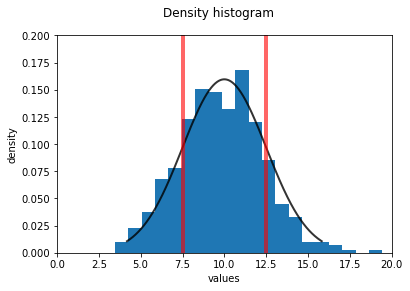

Amount of values between 10 and 15 is:  222
Probability of random value being between 10 and 15:  0.444


,0
count,500.000000
mean,9.830321
std,2.507310
min,3.461789
25%,8.161782
50%,9.762490
75%,11.476371
max,19.439205


In [9]:
# Your code
mu = 10.0
sigma = 2.5
data = np.random.randn(500) * sigma + mu

line1 = mu + 1.0 * sigma
line2 = mu - 1.0 * sigma

rv0 = norm()
rv1=norm(loc = mu, scale = sigma)
fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = rv1.stats(moments='mvsk')
x = np.linspace(rv1.ppf(0.01), rv1.ppf(0.99), 500)
ax.plot(x, rv1.pdf(x), 'r-', lw = 2, alpha=0.8, label = 'norm', color='black')
vals = norm.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))

plt.hist(data, density = True, bins = 20)
plt.axis([0,20,0,0.2])
plt.suptitle('Density histogram')
plt.xlabel('values')
plt.ylabel('density')
plt.axvline(x = line1, color= 'red', lw=4, alpha = 0.6)
plt.axvline(x = line2, color= 'red', lw=4, alpha = 0.6)
plt.show()


between = ((10 <= data) & (data <= 15)).sum()
print("Amount of values between 10 and 15 is: ", between)
print("Probability of random value being between 10 and 15: ", between/500)

dframe = pd.DataFrame(data)
dframe.describe()

**Answers:**

a) Typically the difference is up to $\pm$ 0.2. The answer as to why, probably lies within the randomness of how the numbers are generated. If you increase the sample sizefrom 500 though, the accuracy will drastically improve.

b)They match very clearly although the generated numbers do tend to spike up or fall short of the probability density function at certain points. Again, if you were to increase the number of values to say 10000, and the bins to 35, we would a histogram almost perfectly fitting the function.

c)The counted probability is is between 10.0 and 15.0 is 0.462. According to normal distribution formula. The resulut for f(10) and f(15) is 0.0128 and 1.773x10^-13, respectively(the difference is 0.0128). I can see the counted probability is bigger than theoretical probability is 0.4492. I think it has  a difference because we may use different conclusion forms or may use different methods for predicting the probability.


## Problem 2

The aim of this problem is to learn to use [exponential distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html) from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) library. We use the values given in YouTube video [Example distribution - Example 1](https://www.youtube.com/watch?v=4PEX-SuftjQ).

Coding:
- Create an array `x2` of 2 000 [exponentially distributed](https://en.wikipedia.org/wiki/Exponential_distribution) random numbers having the parameter value $\lambda$ given in the Youtube video. This array simulates the real data.
   - Note: Read carefully the notes of `scipy.stats.expon` function and find out how to convert $\lambda$ to *scale*.
- Calculate the descriptive statistics for the simulated data.
- Draw a histogram of the values. (Remember to tune the bin settings properly).
- Draw also a [boxplot](https://en.wikipedia.org/wiki/Box_plot) of the values.
- Using the *percent point function* (see scipy.stats.expon) find the probability $P(2 < x < 4)$. 
- Count the proportion of the values in the simulated data are between 2 and 4.

Questions:
- What are the values for the *time scale* and $\lambda$ explained in the video?
- What does the `x2` present?
- What is the median value for this dataset (read from the statistics)? How much does it differ from the theoretical value (given in video)?
- What is the [interquartile range](https://en.wikipedia.org/wiki/Interquartile_range) for this data?
- How much do the theoretical probability $P(2 < x < 4)$ and the counted proportion values differ? Explain why.


In [3]:
# Create an array x2 of 2 000 random numbers having the parameter value lamda given in the Youtube video. This array simulates the real data.
# scale = 1/lamda, lamda = 1/2, size = 2000
from scipy.stats import expon
import matplotlib.pyplot as plt
sigma = 2
size = 2000
mean = 1.3863
x2 = expon.rvs(loc=mean, scale=sigma, size=size, random_state=None)
print(x2)

[3.18690191 2.93789941 4.40606381 ... 5.04056397 3.15409525 3.763155  ]


In [4]:
# calculate the descriptive statistics
value = expon()
print("Median:", value.median())
print("Mean:", value.mean())
print("Standard deviation:", value.std())
print("Interquartile range :", value.ppf([0.25, 0.50, 0.75]))

Median: 0.6931471805599453
Mean: 1.0
Standard deviation: 1.0
Interquartile range : [0.28768207 0.69314718 1.38629436]


Text(0.5, 1.0, 'The graph of exponentially distributed random numbers')

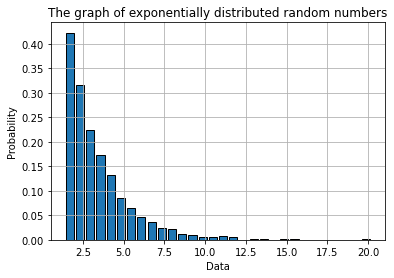

In [5]:
#Draw a histogram of the values
plt.hist(x2, density=True , bins=30, edgecolor='black', rwidth=0.8)
plt.ylabel('Probability')
plt.xlabel('Data');
plt.grid()
plt.title('The graph of exponentially distributed random numbers')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd1be9b6a30>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd1be9c6190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd1be9b66a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd1be9c68b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd1be9c6c40>],
 'means': []}

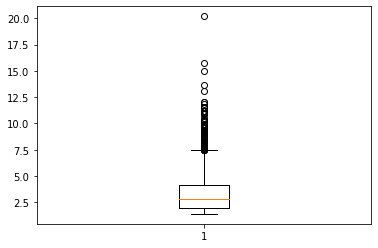

In [6]:
#Draw a boxplot data 
plt.boxplot(x2)

In [7]:
#find the probability P(2 < x < 4)
from scipy.stats import expon
from matplotlib import pyplot
# create distribution
dist = expon()
data = dist.cdf(4.0) - dist.cdf(2.0)
print("P(2 < x < 4) is", data)

P(2 < x < 4) is 0.11701964434787848


In [8]:
#Count the proportion of the values in the simulated data are between 2 and 4.
a = ((2 <= x2) & (x2 <= 4)).sum()
print("Amount of the values between 2 and 4:", a)
b = a / 2000
print("Proportion of the values between 2 and 4:", b)

Amount of the values between 2 and 4: 938
Proportion of the values between 2 and 4: 0.469


**Answers:**

a) The value time scale is minutes and lamda is customer per minute in the video

b) x2 is just a variable name

c) The mean for this dataset is about 1. The difference between dataset and video is 1.3863 - 1 = 0.3863

d) The Interquartile range : [0.28768207 0.69314718 1.38629436]

e)The difference between theoretical probability and counted proportion values is 0.4735 - 0.117 = 0.3565. It has the diffence because probability when talking about the chances of some event happening in the future and proportion when describing some events actually happened in the past.

## Problem 3

In this problem we study how the accelerometer sensor measurements are distributed. Attached is an example data recorded with [Physics Toolbox Accelerometer](https://play.google.com/store/apps/details?id=com.chrystianvieyra.android.physicstoolboxaccelerometer) application that is freely available in Google Play. Make your own recording using this application:
- Install the application to your mobile phone.
- Open the application.
- Place your mobile phone on the flat surface (for example on the table).
- Click the (+) button to start recording.
- Record at least 30 seconds of data.
- Save the file and send it by email to yourself.

Coding:
- Open the file using Pandas read_csv function.
   - You might need to define `sep` and `decimal` parameters for read_csv. See the documentation for details.
- Create separate graphical plots of the accelerometer data (gFx, gFy, ...). Place the time on x-axis.
- Calculate the descriptive statistics for the accelerometer data.
- Create histograms and annotate the graphics with vertical lines at $\mu \pm \sigma$.
- Select randomly one row from the data and print out the values.

Questions:
- What are the mean values for gFx, gFy, and gFz? How can you predict the orientation of your mobile phone from these values?
- Compare the standard deviations for gFx, gFy, and gFz. How much do they differ? Explain the similarities or diffences.
- How does the histograms of the acceleration data look like? What probability distribution could fit to this data?
- Study the randomly selected row from the data and compare it to the statistics. If you would get only one sample (like this), how confident you would be about the readings? Explain why.



In [9]:
# Open the file
# define: decimal = ',' and sep = ';'
import pandas
file = pandas.read_csv('Android_data.csv')
file.head()

,time,gFx,gFy,gFz,TgF
0,0.006520,0.8431,0.0168,0.5685,1.017
1,0.007143,0.8550,0.0181,0.5633,1.024
2,0.007573,0.8416,0.0161,0.5674,1.015
3,0.007954,0.8578,0.0181,0.5689,1.029
4,0.008318,0.8404,0.0195,0.5706,1.016


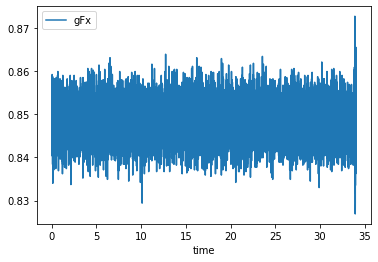

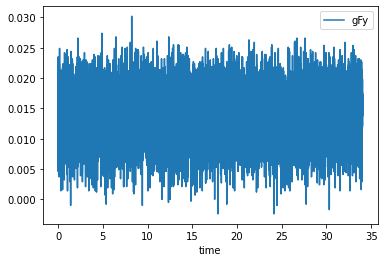

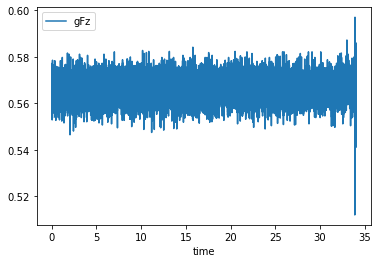

In [10]:
#create a graph
file.plot('time','gFx')
file.plot('time','gFy')
file.plot('time','gFz')
plt.show()

In [11]:
#Calculate the descriptive statistics
file.describe()

,time,gFx,gFy,gFz,TgF
count,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000
mean,17.011644,0.848517,0.014207,0.566123,1.020157
std,9.830157,0.004242,0.004229,0.005094,0.004470
min,0.006520,0.826900,-0.002400,0.511900,0.992000
25%,8.500180,0.845700,0.011400,0.562900,1.017000
50%,17.013007,0.848500,0.014600,0.566200,1.020000
75%,25.523445,0.851300,0.017000,0.569400,1.023000
max,34.036185,0.872700,0.030200,0.597000,1.043000


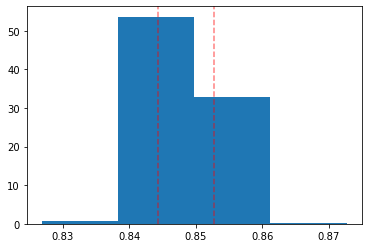

In [12]:
#gFx 
std = np.std(file['gFx'])
mean = np.mean(file['gFx'])
s = np.random.normal(mean, std,400)
plt.hist(file[['gFx']], density = True, bins = 4)
plt.axvline(x=mean-1*std,linestyle='dashed', alpha=0.5,color='r')
plt.axvline(x=mean+1*std,linestyle='dashed', alpha=0.5,color='r')
plt.show()

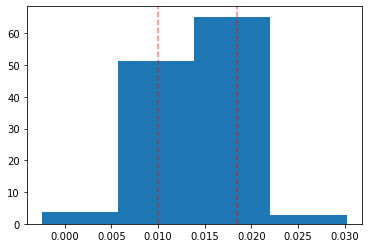

In [13]:
#gFy
std = np.std(file['gFy'])
mean = np.mean(file['gFy'])
s = np.random.normal(mean, std,400)
plt.hist(file[['gFy']], density = True, bins = 4)
plt.axvline(x=mean-1*std,linestyle='dashed', alpha=0.5,color='r')
plt.axvline(x=mean+1*std,linestyle='dashed', alpha=0.5,color='r')
plt.show()

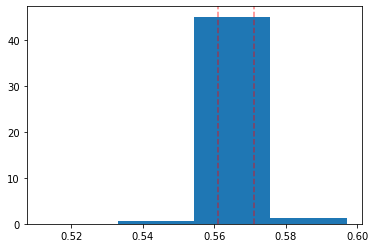

In [14]:
#gFz
std = np.std(file['gFz'])
mean = np.mean(file['gFz'])
s = np.random.normal(mean, std,400)
plt.hist(file[['gFz']], density = True, bins = 4)
plt.axvline(x=mean-1*std,linestyle='dashed', alpha=0.5,color='r')
plt.axvline(x=mean+1*std,linestyle='dashed', alpha=0.5,color='r')
plt.show()

In [15]:
df = pd.DataFrame(file)
df.sample()
np.std(df)
np.mean(df)

time    17.011644
gFx      0.848517
gFy      0.014207
gFz      0.566123
TgF      1.020157
dtype: float64

**Answers:**

a)gFx, gFy, gFz represent for x, y, z asix, respectively. I think we can see the direcion and the orientation of the device from mean values.

b)From file.describe(), the standard deviation is 0.004242	0.004229	0.005094 for gFx, gFy, and gFz. The gFx, and gFy are almost the same and close to gFz value, so it does not have much differences

c)Histograms are look like ripples of model and normal distribution can fit this data

d)I can see the data from randomly selected row matches to statistics, so i can say the values are the same for all values after prediction so I would confidently get any sample.